In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
import sys

!pip install q keras==2.1.4 
import keras
print(sys.version)
print(keras.__version__)

3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
2.2.5


In [0]:
#loading the datasets 
(X_train, y_train ), (X_test, y_test ) =cifar10.load_data()

In [0]:
#Lets determing the dataset characteristics

print("Training Images {}".format(X_train.shape))
print("Testing Images {}".format(X_test.shape))

Training Images (50000, 32, 32, 3)
Testing Images (10000, 32, 32, 3)


In [0]:
#A single image shape
print(X_train[0].shape) # very important step

(32, 32, 3)


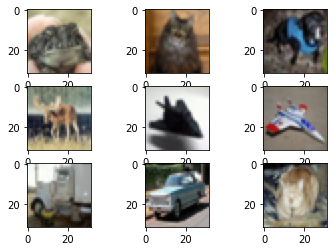

In [0]:
# Creating a 3 x 3 grid for images 

for i in range (0,9):
  plt.subplot(330 + 1 + i)
  img = X_train[i+25]
  plt.imshow(img)

#Display image
plt.show()

In [0]:
#Preprocessing the datasets

#Fixing the random seed for reproducibility
seed  = 6
np.random.seed(seed)


#Again loading the dataset
(X_train, y_train ), (X_test, y_test ) =cifar10.load_data()

#normalize the databas from 0-255 to 0-1
#First convert the int values to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


#Now converting it to 0-1 form
X_train = X_train/255
X_test = X_test/255

In [0]:
#Class labels in shape 
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [0]:
#[6] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0] one-hot vector that is used to represent the class of the train set 

# Now hot encoding the test values
Y_train = np_utils.to_categorical(y_train)
Y_test  = np_utils.to_categorical(y_test)

num_class = Y_test.shape[1]


print(num_class)
print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Bulding the All CNN MODEL**

We are Using the model from the paper of all simple the cnn modle
 MODEL - C
 * Input 32 × 32 RGB image
 * 3 × 3 conv. 96 ReLU
 * 3 × 3 conv. 96 ReLU
 * 3 × 3 max-pooling stride 2
 * 3 × 3 conv. 192 ReLU
 * 3 × 3 conv. 192 ReLU
 * 3 × 3 max-pooling stride 2
 * 3 × 3 conv. 192 ReLU
 * 1 × 1 conv. 192 ReLU
 * 1 × 1 conv. 10 ReLU
 * global averaging over 6 × 6 spatial dimensions
 * 10 or 100-way softmax

In [0]:
from keras.models  import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [0]:
#Defining the model functions
#if the weights are not given then the model assumes random weights and thus will work with random weights
def allcnn(weights = None ):
  #adding the layers 
  model = Sequential()

  model.add(Conv2D(96,(3, 3), padding = 'same', input_shape = (32, 32, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(96, (3, 3), padding = 'same'))
  model.add(Activation('relu'))
  
  model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2, 2)))
  model.add(Activation('relu'))
  
  model.add(Conv2D(192, (3, 3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (3, 3), padding = 'same'))
  model.add(Activation('relu'))

  model.add(Conv2D(192, (3, 3), padding = 'same', strides =(2, 2)))
  model.add(Activation('relu'))

  model.add(Conv2D(192, (3, 3), padding = 'same'))
  model.add(Activation('relu'))

  model.add(Conv2D(192, (1, 1), padding = 'valid'))
  model.add(Activation('relu'))
  model.add(Conv2D(10, (1, 1), padding = 'valid'))
  model.add(Activation('relu'))



  #Global average pooling layer with softmax activation

  model.add(GlobalAveragePooling2D())
  model.add(Activation('softmax'))

  # Loading the weights so that pretrained weights can be easily be passed to the model 
  if weights:
    model.load_weights(weights)

#Return the model 
  return model

In [0]:
#Defining the hyper parameters for the  CNN

learing_rate = 0.01
weight_decay = 1e-6
momentum = 0.9 



#Building the model
#Using the pre-trained weights 
weights = '/content/all_cnn_weights_0.9088_0.4994.hdf5' # Loading the file uploaded with its path specified else it will fail
model = allcnn(weights)

#Define thee optimizer and complie the model

sgd=SGD(lr=learing_rate, decay=weight_decay, momentum=momentum, nesterov = True)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])


#print model summary
print (model.summary())


#Defining additional training parameters
#epochs = 500 
#batch_size = 32

#Fit the model
#model.fit(X_train, Y_train, validation_data  = (X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose=1)



# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_41 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
activation_43 (Activation)   (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 192)      

In [0]:
#Make dictionary pf class labels and names

classes = range(0,10)

names = ['airplane',
        'car',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']


# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)


9/9 [==============================] - 0s 816us/step


In [0]:
# these are class probabilities ,should sum to 1

for image in predictions:
  print(np.sum(image))

0.9999999
1.0000001
1.0
1.0
1.0
1.0
0.99999994
0.9999999
1.0


In [0]:
#use no.argmax( ) to conver class probabilites to class labels
class_result = np.argmax(predictions, axis = -1)
print (class_result)



[4 5 6 3 1 1 3 6 8]


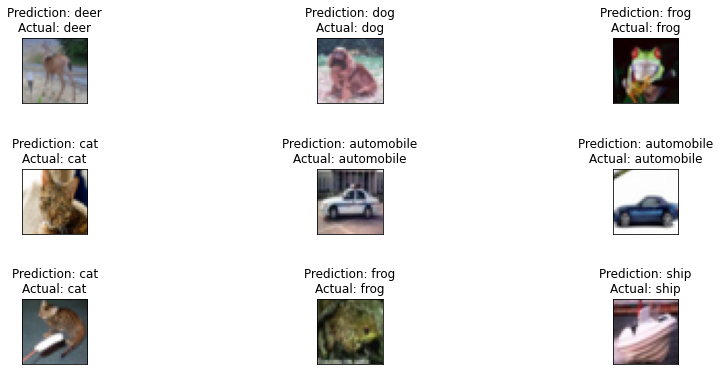

In [0]:
# create a grid of 3 x 3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()